# 2.3 Random Forest models with ClimateWins data

## Contents:

### 1. Importing Libraries and Data
- loading cleaned wx observations from 2.2, and pleasant_wx

### 2. Data Wrangling
- limit to 1 decade at a time to limit model runtime

### 3. Random Forest Model
- plot figures of at least two different trees
- record accuracy of the model

### 4. Create list of the feature importances
- reshape list
- collapse shape into one observation for each wx station

### 5. Bar Chart of Importances against list of Wx stations

### 6. Subset data - Every Year/ 1 Station
- run it for top 3 stations in order of importances

### 7. Random Forrest Model for each Station

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import metrics  
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# Setting Path 

path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER'

In [5]:
# delimiting columns displayed
pd.options.display.max_columns = None

In [6]:
pleasant = pd.read_csv (os.path.join(path, '02 Data', 'pleasant_wx_predictions.csv'), index_col = False)

In [7]:
X = pd.read_pickle(os.path.join(path, '02 Data', 'X_cleaned.pkl'))

In [8]:
pleasant.shape

(22950, 16)

In [9]:
X.shape

(22950, 135)

In [10]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

### 2. Data Wrangling
For this notebook version:
- 1 wx station, all years

In [11]:
keep = list(x for x in X.columns if not x.find('LJUBLJANA') >=0)
#Create a list of the data that doesn't contain the weather station name above.
keep.sort()
keep

['BASEL_cloud_cover',
 'BASEL_global_radiation',
 'BASEL_humidity',
 'BASEL_precipitation',
 'BASEL_pressure',
 'BASEL_sunshine',
 'BASEL_temp_max',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BELGRADE_cloud_cover',
 'BELGRADE_global_radiation',
 'BELGRADE_humidity',
 'BELGRADE_precipitation',
 'BELGRADE_pressure',
 'BELGRADE_sunshine',
 'BELGRADE_temp_max',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_global_radiation',
 'BUDAPEST_humidity',
 'BUDAPEST_precipitation',
 'BUDAPEST_pressure',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_max',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'DEBILT_cloud_cover',
 'DEBILT_global_radiation',
 'DEBILT_humidity',
 'DEBILT_precipitation',
 'DEBILT_pressure',
 'DEBILT_sunshine',
 'DEBILT_temp_max',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_humidity',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_pressure',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_max',
 

In [13]:
#Create an 'X' matrix by dropping the unneeded columns. One weather station, full time period.
X2 = X.drop(keep, axis=1)
#y = df_keyyear.drop(['DATE'], axis=1)
X2

,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max
0,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5
1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5
2,8,0.96,1.0173,0.20,0.12,0.0,4.6,0.9,6.3
3,6,0.94,1.0173,0.49,0.00,2.2,3.2,1.0,7.0
4,7,0.94,1.0173,0.20,0.00,0.0,3.6,0.4,4.8
...,...,...,...,...,...,...,...,...,...
22945,4,0.80,1.0289,1.35,0.37,5.9,14.7,12.1,21.1
22946,3,0.82,1.0291,1.35,0.37,4.5,12.9,9.8,19.8
22947,3,0.81,1.0270,1.35,0.37,5.1,13.2,10.2,20.7
22948,3,0.77,1.0238,1.35,0.37,5.7,14.0,10.0,23.1


In [14]:
y2 = pleasant['LJUBLJANA_pleasant_weather']
y2

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: LJUBLJANA_pleasant_weather, Length: 22950, dtype: int64

In [16]:
X2.shape

(22950, 9)

In [17]:
y2.shape

(22950,)

In [18]:
# turning X2 and y2 from a df to arrays (X and y)

X = np.array(X2)
y = np.array(y2)

In [20]:
# verifying array shape

X

array([[ 8.    ,  1.    ,  1.0173, ..., -0.6   , -1.9   ,  0.5   ],
       [ 6.    ,  0.94  ,  1.0173, ...,  2.1   , -1.3   ,  5.5   ],
       [ 8.    ,  0.96  ,  1.0173, ...,  4.6   ,  0.9   ,  6.3   ],
       ...,
       [ 3.    ,  0.81  ,  1.027 , ..., 13.2   , 10.2   , 20.7   ],
       [ 3.    ,  0.77  ,  1.0238, ..., 14.    , 10.    , 23.1   ],
       [ 3.    ,  0.77  ,  1.0114, ..., 13.6   ,  8.8   , 23.4   ]])

In [22]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20, random_state = 38)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [26]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [27]:
X_train

array([[ 2.    ,  0.82  ,  1.0229, ..., 12.5   ,  6.4   , 20.1   ],
       [ 2.    ,  0.62  ,  1.0108, ..., 18.3   ,  8.6   , 24.5   ],
       [ 8.    ,  0.85  ,  1.0167, ...,  5.    ,  1.3   ,  9.3   ],
       ...,
       [ 8.    ,  0.87  ,  1.0111, ...,  0.4   , -0.7   ,  2.7   ],
       [ 3.    ,  0.75  ,  1.0261, ..., 12.3   ,  5.6   , 19.6   ],
       [ 2.    ,  0.63  ,  1.016 , ..., 10.3   ,  2.2   , 17.    ]])

In [28]:
X_test

array([[ 8.    ,  0.93  ,  1.0092, ..., -1.5   , -6.6   ,  1.    ],
       [ 8.    ,  0.87  ,  1.0161, ...,  9.1   ,  7.    , 16.1   ],
       [ 8.    ,  0.9   ,  1.0127, ..., 11.6   ,  8.2   , 18.    ],
       ...,
       [ 7.    ,  0.91  ,  1.0174, ...,  7.4   ,  6.8   , 15.1   ],
       [ 2.    ,  0.51  ,  1.0156, ..., 21.3   , 11.5   , 27.8   ],
       [ 8.    ,  0.87  ,  1.0119, ...,  9.3   ,  6.6   , 11.1   ]])

In [29]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

### 3. Random Forest Model

In [30]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth = 5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


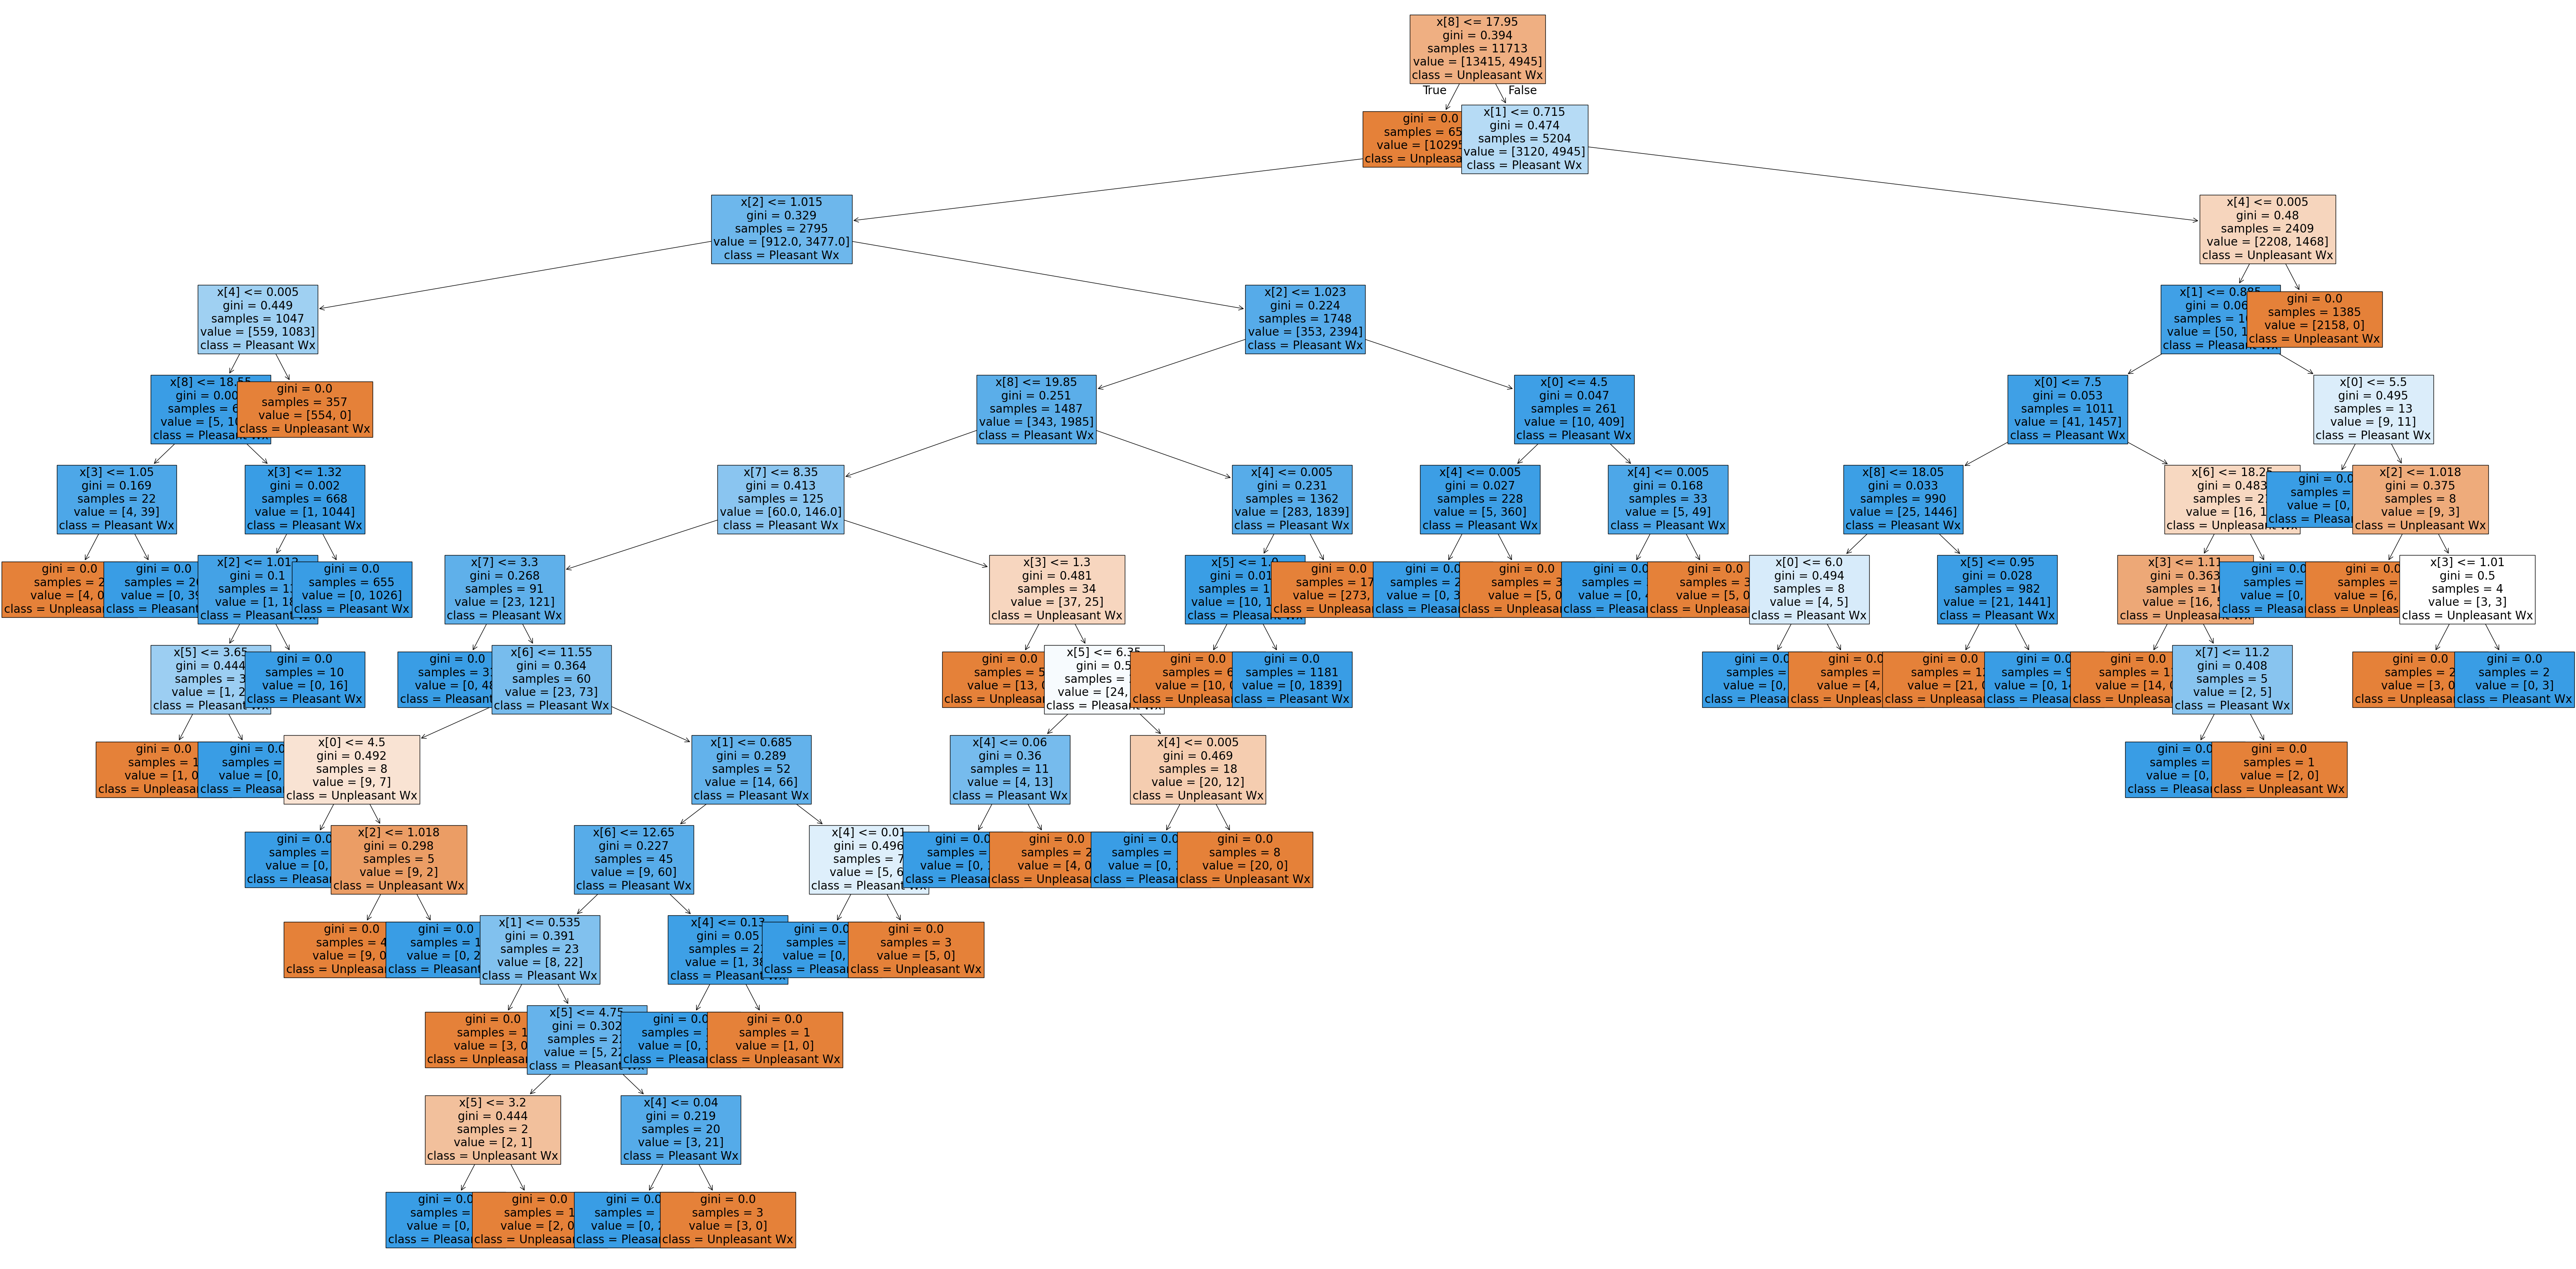

In [33]:
types = {0:'Unpleasant Wx', 1:'Pleasant Wx'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

### 4. Relative importance of Factors

In [39]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.05522859, 0.01683763, 0.01000231, 0.08908831, 0.35470041,
       0.09978597, 0.09174039, 0.01087513, 0.27174125])

In [35]:
np.set_printoptions(threshold=1000)

In [41]:
station1 = list(x for x in X2.columns if x.find('LJUBLJANA') >=0)
#Basel.sort()
station1

['LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max']

In [44]:
newarray = pd.Series(newarray, index = station1) #.sort_values(ascending = False)
newarray

LJUBLJANA_cloud_cover         0.055229
LJUBLJANA_humidity            0.016838
LJUBLJANA_pressure            0.010002
LJUBLJANA_global_radiation    0.089088
LJUBLJANA_precipitation       0.354700
LJUBLJANA_sunshine            0.099786
LJUBLJANA_temp_mean           0.091740
LJUBLJANA_temp_min            0.010875
LJUBLJANA_temp_max            0.271741
dtype: float64

['LJUBLJANA_cloud_cover', 'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 'LJUBLJANA_global_radiation', 'LJUBLJANA_precipitation', 'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max']


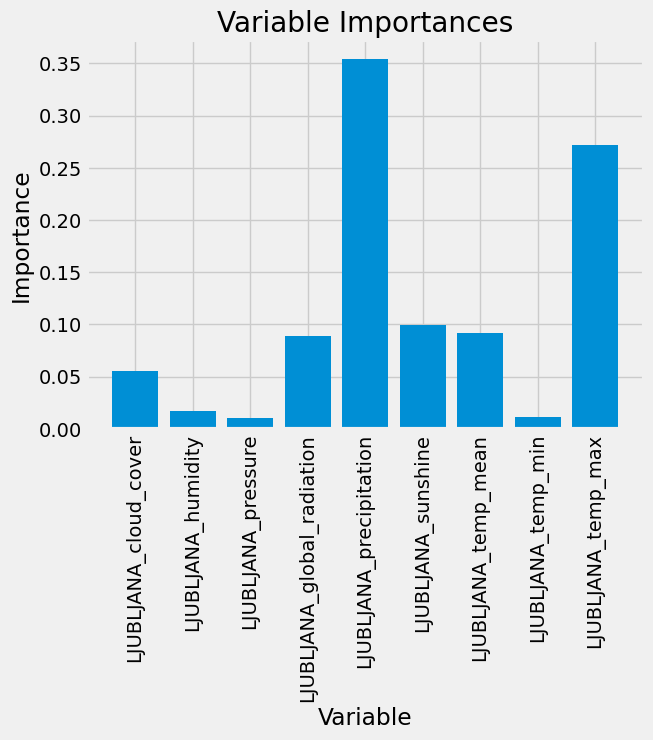

In [45]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(station1)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, station1, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');